## **Capstone Project Lifestyle and Learning – Predicting Student Performance**

#### **Course:** ECE Elective 2 Emerging Technologies
#### **Program:** BS ECE

* *Al-Hajri, Sarah Bint Mubarak F.*
* *Camonias, Elizhea C.*
* *Orpilla, Sigmund Yona Marie A.*

---

---
# I. Introduction

This project utilizes a simulated dataset of 1,000 student records sourced from Kaggle. Each record captures key lifestyle habits—such as study hours, sleep patterns, screen time, diet, and mental health— and relates them to academic performance, specifically the final exam score. The dataset is ideal for educational machine learning applications, enabling learners to perform data preprocessing, visualization, clustering, regression, and classification.

You are tasked with analyzing how these lifestyle factors affect student
performance, and building predictive models based on insights you derive.


# II. Project Goals
- Determine relationships between lifestyle habits and final exam scores
- Discover meaningful student groupings based on lifestyle through clustering
- Build and evaluate models that predict academic performance
- Summarize and communicate findings through data storytelling
---


####**Dataset:**
[student_habits_performance.csv](https://tupmla-my.sharepoint.com/:x:/g/personal/timothy_amado_tup_edu_ph/EfN9-KVzM0JMqo7dl7XNWO4BnY2EA5M44xa27TcDsnJCpA?e=fCKSz5)

---
####**Contents:**
1. [Problem Definition](https://colab.research.google.com/drive/1nOhQxv_G6qzD03yyOOC7ZD-wztRiV3w2#scrollTo=OG6u-5BCyo_p&line=1&uniqifier=1)
2. [Data Understanding and Preprocessing](https://colab.research.google.com/drive/1nOhQxv_G6qzD03yyOOC7ZD-wztRiV3w2#scrollTo=kBK791oEhqus&line=3&uniqifier=1)
3. [Exploratory Data Analysis (EDA)](https://colab.research.google.com/drive/1nOhQxv_G6qzD03yyOOC7ZD-wztRiV3w2#scrollTo=feb99c29)
4. [Clustering (Unsupervised Learning)](https://colab.research.google.com/drive/1nOhQxv_G6qzD03yyOOC7ZD-wztRiV3w2#scrollTo=9718269f)
5. [Regression Analysis (Supervised Learning)](https://colab.research.google.com/drive/1nOhQxv_G6qzD03yyOOC7ZD-wztRiV3w2#scrollTo=4e6e0b02)
6. [Optional Classification Task](https://colab.research.google.com/drive/1nOhQxv_G6qzD03yyOOC7ZD-wztRiV3w2#scrollTo=0NXYPy1F6NcA)
7. [Interpretation and Insights](https://colab.research.google.com/drive/1nOhQxv_G6qzD03yyOOC7ZD-wztRiV3w2#scrollTo=wOMVrdM63Jip)

# Student Performance Prediction: Full Analysis

This notebook contains combined EDA, clustering, and supervised learning analysis based on lifestyle data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder


#Dataset Preprocessing
df = pd.read_csv('/content/student_habits_performance.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Drop rows with missing values (you can also use df.fillna(...) as needed)
df = df.dropna()

# Feature engineering: combine Netflix and social media time into total screen time
df['total_screen_time'] = df['netflix_hours'] + df['social_media_hours']


Missing values per column:
student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


<ipython-input-4-707b8a5be8d7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_screen_time'] = df['netflix_hours'] + df['social_media_hours']


# III. Project Components

## 1. Problem Definition
Is there a correlation between a student’s mental health rating and their parents’ level of education?

- Mental Health Rating vs Parent's Level of Education
- Mental Health Rating vs Student Performance
- Parent's Level of Education vs Student Performance


## 2. Understanding and Preproessing
- Load and inspect the dataset
- Handle:
  - Missing values
  - Categorical variables (apply label/one-hot encoding)
  - Scaling (for models like K-Means and regression)
- Engineer new features if helpful (e.g., combine screen time metrics)



In [ ]:
# Load dfset
df= pd.read_csv("student_habits_performance.csv")

# Display original structure
print("Original Data Overview:")
display(df.head())
display(df.columns)

# Keep only relevant columns

df_original = df.copy()  # full version for classification

# Then do column trimming if needed:
columns_to_keep = ['mental_health_rating', 'parental_education_level', 'exam_score']
df = df[columns_to_keep]





# Display unique values of parental education
print("\nUnique values in 'parental_education_level':")
print(df['parental_education_level'].unique())
df['parental_education_raw'] = df['parental_education_level']


# One Hot Encode 'parental_education_level'
onehot_encoder = OneHotEncoder(sparse_output=False)
encoded = onehot_encoder.fit_transform(df[['parental_education_level']])
encoded_df = pd.DataFrame(encoded, columns=onehot_encoder.get_feature_names_out(['parental_education_level']))

# Merge and drop original column
df = pd.concat([df.drop(['parental_education_level'], axis=1), encoded_df], axis=1)

# Final display of cleaned dfset
print("\nCleaned Dataset Preview:")
display(df.info())
display(df.head())


Original Data Overview:


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')


Unique values in 'parental_education_level':
['Master' 'High School' 'Bachelor' nan]

Cleaned Dataset Preview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   mental_health_rating                  1000 non-null   int64  
 1   exam_score                            1000 non-null   float64
 2   parental_education_raw                909 non-null    object 
 3   parental_education_level_Bachelor     1000 non-null   float64
 4   parental_education_level_High School  1000 non-null   float64
 5   parental_education_level_Master       1000 non-null   float64
 6   parental_education_level_nan          1000 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 54.8+ KB


None

,mental_health_rating,exam_score,parental_education_raw,parental_education_level_Bachelor,parental_education_level_High School,parental_education_level_Master,parental_education_level_nan
0,8,56.2,Master,0.0,0.0,1.0,0.0
1,8,100.0,High School,0.0,1.0,0.0,0.0
2,1,34.3,High School,0.0,1.0,0.0,0.0
3,1,26.8,Master,0.0,0.0,1.0,0.0
4,1,66.4,Master,0.0,0.0,1.0,0.0


## 3. Exploratory Data Analysis

- Visualizations:
  - Histograms for feature distributions
  - Scatter plots and box plots for comparing habits vs. scores
  - Correlation heatmap

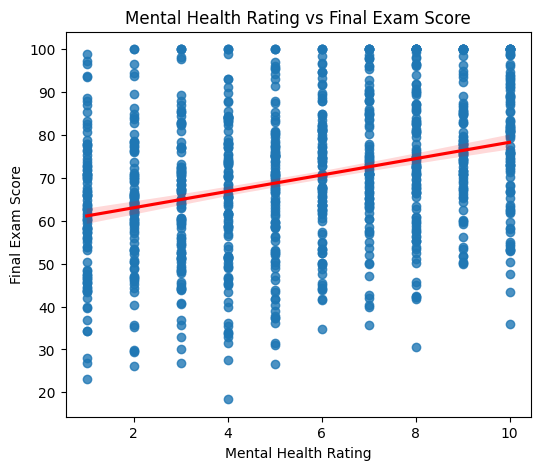

Pearson correlation between mental health rating and final exam score: 0.32


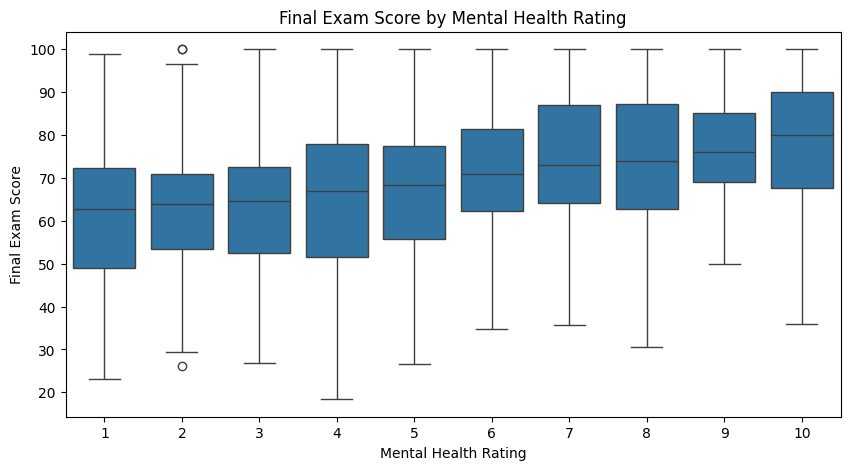

In [ ]:
#Correlation Between Mental Health and Final Exam Scores
# 1.Scatter Plot with Regression Line

plt.figure(figsize=(6, 5))
sns.regplot(x='mental_health_rating', y='exam_score', data=df, line_kws={"color":"red"})
plt.title('Mental Health Rating vs Final Exam Score')
plt.xlabel('Mental Health Rating')
plt.ylabel('Final Exam Score')
plt.show()
#(This will show trend direction and strength visually.)


#2 Pearson correlation
correlation = df['mental_health_rating'].corr(df['exam_score'])
print(f"Pearson correlation between mental health rating and final exam score: {correlation:.2f}")
#(Close to 1 or -1 → strong correlation.; Close to 0 → weak or no correlation.)


#3 Box Plot by Mental Health Rating Groups
plt.figure(figsize=(10, 5))
sns.boxplot(x='mental_health_rating', y='exam_score', data=df)
plt.title('Final Exam Score by Mental Health Rating')
plt.xlabel('Mental Health Rating')
plt.ylabel('Final Exam Score')
plt.show()





1. Scatter Plot & Regression Line
The upward slope indicates a positive relationship.

Students with higher mental health ratings tend to score higher on final exams.

2. Pearson Correlation Coefficient: 0.32
A value of 0.32 suggests a moderate positive correlation.

While not strong, it's statistically meaningful, especially in social science contexts (education, behavior).

This supports the idea that mental well-being plays a role in academic performance.

3. Boxplot by Mental Health Rating
The gradual increase in medians and reduced score variability with higher ratings show consistency.

This confirms the trend: better mental health = better scores on average.

-----------------
There is a moderate positive relationship between students’ mental health and their final exam performance. This trend is observable in both statistical measures and visualizations. It suggests that efforts to improve student well-being may positively impact academic outcomes.




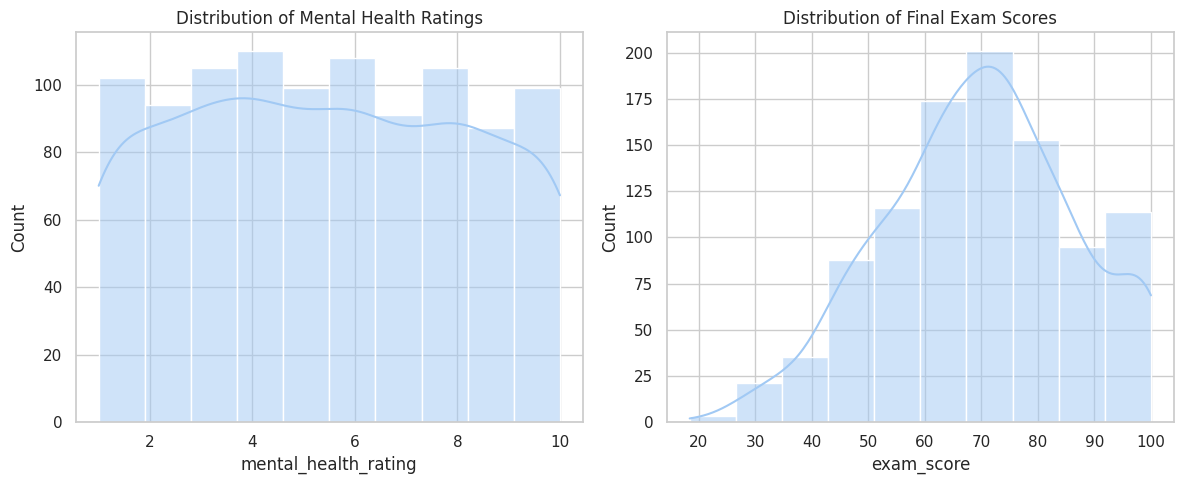

In [ ]:

# Set plot styles
sns.set(style='whitegrid', palette='pastel')

# 1. HISTOGRAMS
# Visualize distribution of mental health ratings and final exam scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['mental_health_rating'], bins=10, kde=True)
plt.title('Distribution of Mental Health Ratings')

plt.subplot(1, 2, 2)
sns.histplot(df['exam_score'], bins=10, kde=True)
plt.title('Distribution of Final Exam Scores')

plt.tight_layout()
plt.show()


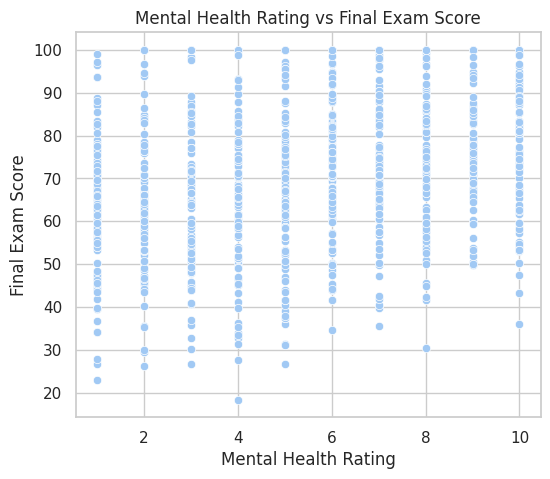

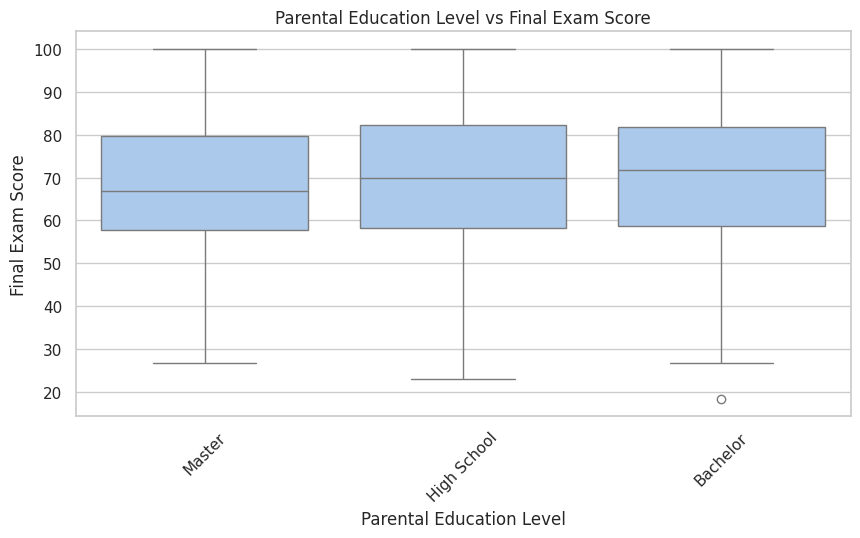

In [ ]:

# 2. SCATTER PLOTS & BOX PLOTS
# -------------------------------
# Scatter: Mental Health vs. Final Exam Score
plt.figure(figsize=(6, 5))
sns.scatterplot(x='mental_health_rating', y='exam_score', data=df)
plt.title('Mental Health Rating vs Final Exam Score')
plt.xlabel('Mental Health Rating')
plt.ylabel('Final Exam Score')
plt.show()

# Boxplot: Parental Education Level vs Final Score
plt.figure(figsize=(10, 5))
sns.boxplot(x='parental_education_raw', y='exam_score', data=df)
plt.title('Parental Education Level vs Final Exam Score')
plt.xlabel('Parental Education Level')
plt.ylabel('Final Exam Score')
plt.xticks(rotation=45)
plt.show()

<ipython-input-52-e3bef33e0ed3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_original, x='parental_education_level', y='mental_health_rating', palette='Set2')


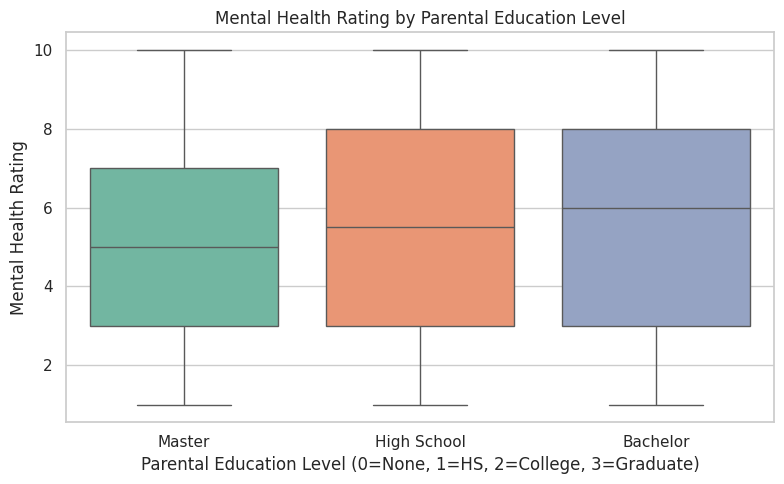

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_original, x='parental_education_level', y='mental_health_rating', palette='Set2')
plt.title('Mental Health Rating by Parental Education Level')
plt.xlabel('Parental Education Level (0=None, 1=HS, 2=College, 3=Graduate)')
plt.ylabel('Mental Health Rating')
plt.tight_layout()
plt.show()


In [ ]:
# Temporary mapping for correlation (do not overwrite original column)
edu_map = {
    'None': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Master': 4,
}

# Map to new temporary numeric column
df_original['edu_numeric'] = df_original['parental_education_level'].map(edu_map)

# Now calculate correlation
corr = df_original[['edu_numeric', 'mental_health_rating']].corr().iloc[0, 1]
print(f"🔗 Correlation between parental education level and mental health rating: {corr:.3f}")


🔗 Correlation between parental education level and mental health rating: -0.097


Observations:

1. Mental Health vs Exam Score

There is no strong visible correlation; students with both high and low mental health ratings achieved a wide range of exam scores.

The distribution of exam scores appears similarly spread out for all mental health levels.

This suggests mental health rating alone may not be a strong predictor of exam performance in this dataset.

2. Parent's Education Level vs Exam Score

Median scores are relatively similar across groups.

Slightly higher for students whose parents have a Bachelor’s degree.

Score variability is similar across all three categories.

No clear outlier pattern indicating that parental education may not have a major direct effect on the scores, or the effect might be subtle or context-dependent.

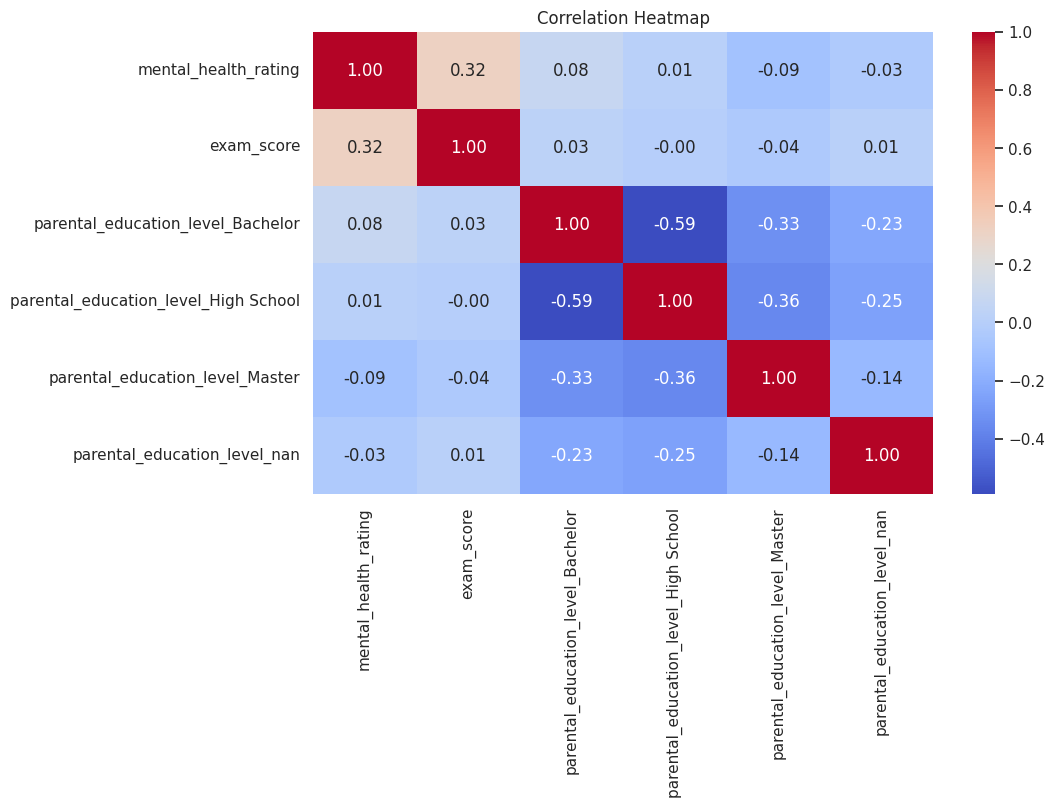

In [ ]:

# -------------------------------
# 3. CORRELATION HEATMAP
# -------------------------------
# Compute correlations
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


1. Mental Health and Exam Score:

Correlation: 0.32

This is a moderate positive correlation, indicating that better mental health ratings are associated with higher exam scores.

2. Exam Score and Parental Education:

Very weak correlations again (between -0.04 and 0.03), indicating no meaningful direct linear relationship between exam score and parental education level in this encoding.

3. Mental Health and Parental Education:

Very weak correlations (all between -0.09 and 0.08), suggesting no significant linear relationship between parental education level and a student's mental health rating.



# 4. Clustering (Unsupervised Learning)
- Apply K-Means clustering using lifestyle features (excluding exam score)
- Determine optimal K using:  
  - Elbow method (inertia plot)
  - Silhouette score
- Label and describe each cluster

## Data Preprocessing


In [ ]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dfset
df = pd.read_csv("student_habits_performance.csv")

# Drop the student_id column
df.drop(columns=["student_id"], inplace=True)
# Make a copy before any modifications (to preserve unscaled df)
df_original = df.copy()

# Encode binary categorical variables (Label Encoding: 0/1)
binary_cols = ['gender', 'part_time_job', 'extracurricular_participation']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Encode ordinal categorical variables using custom mappings
diet_quality_map = {'Poor': 0, 'Fair': 1, 'Good': 2}
internet_quality_map = {'Poor': 0, 'Average': 1, 'Good': 2}
parental_education_map = {'None': 0, 'High School': 1, 'College': 2, 'Graduate': 3}

df['diet_quality'] = df['diet_quality'].map(diet_quality_map)
df['internet_quality'] = df['internet_quality'].map(internet_quality_map)
df['parental_education_level'] = df['parental_education_level'].map(parental_education_map)

# Handle any unmapped values (e.g., if missing or unexpected labels)
df[['diet_quality', 'internet_quality', 'parental_education_level']] = df[[
    'diet_quality', 'internet_quality', 'parental_education_level'
]].fillna(-1)  # or use .dropna() if preferred

# Feature Engineering: Create total_screen_time
df['total_screen_time'] = df['social_media_hours'] + df['netflix_hours']

# Scale numerical features
features_to_scale = [
    'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating', 'total_screen_time'
]

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Final preview
df.head()


,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,total_screen_time
0,1.084551,0,-2.418068,-1.114064,-0.669750,0,0.092426,1.248120,1,1.461166,-1.0,1,0.900186,1,56.2,-1.266536
1,-0.215870,0,2.281707,0.251315,0.446965,0,1.401696,-1.525661,2,1.461166,1.0,1,0.900186,0,100.0,0.484551
2,0.217604,1,-1.464491,0.507324,-0.483631,0,1.135584,1.248120,0,-1.008689,1.0,0,-1.559339,0,34.3,0.046779
3,1.084551,0,-1.736942,1.190013,-0.762810,0,-1.397800,2.227102,0,0.473224,-1.0,2,-1.559339,1,26.8,0.359473
4,-0.649344,0,0.987566,1.616694,-1.228108,0,0.720450,-1.280916,1,-0.020747,-1.0,2,-1.559339,0,66.4,0.359473


## A. Applying K-means Clustering



In [ ]:
# Prepare features for clustering: drop the target and standardize
features_for_clustering = df.drop(columns=['exam_score', 'student_id'], errors='ignore')  # ignore id if already dropped

# One-hot encode categorical variables
features_for_clustering = pd.get_dummies(features_for_clustering, drop_first=True)

# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_for_clustering = scaler.fit_transform(features_for_clustering)


K | Inertia     | Silhouette Score
-----------------------------------
2  | 13695.87    | 0.0800
3  | 13157.24    | 0.0555
4  | 12631.54    | 0.0589
5  | 12482.47    | 0.0491
6  | 12004.57    | 0.0517
7  | 11714.63    | 0.0519
8  | 11320.18    | 0.0535
9  | 11136.66    | 0.0556
10 | 10947.78    | 0.0551


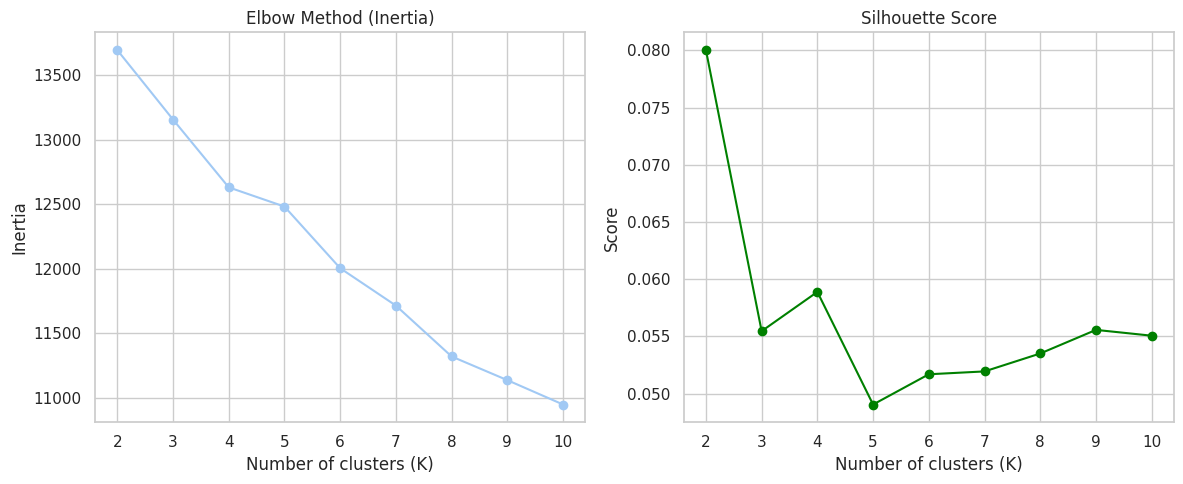

 Elbow Method suggests optimal K = None
 Silhouette Score suggests optimal K = 2
Final chosen K for clustering = 2


In [ ]:
!pip install kneed --quiet  # Install only if not already available

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Try multiple K values
inertias = []
silhouette_scores = []
K_range = range(2, 11)

print("K | Inertia     | Silhouette Score")
print("-" * 35)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features_for_clustering)

    inertia = kmeans.inertia_
    silhouette = silhouette_score(features_for_clustering, cluster_labels)

    inertias.append(inertia)
    silhouette_scores.append(silhouette)

    print(f"{k:<2} | {inertia:<11.2f} | {silhouette:.4f}")

# Plot Elbow and Silhouette
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Find elbow point using KneeLocator
knee_locator = KneeLocator(K_range, inertias, curve="convex", direction="decreasing")
optimal_k_elbow = knee_locator.knee

# Find max silhouette score
optimal_k_silhouette = K_range[silhouette_scores.index(max(silhouette_scores))]

print(" Elbow Method suggests optimal K =", optimal_k_elbow)
print(" Silhouette Score suggests optimal K =", optimal_k_silhouette)

# Optional: Pick one or average
# Use the silhouette-based K (more robust for separation)
final_k = optimal_k_silhouette
print("Final chosen K for clustering =", final_k)


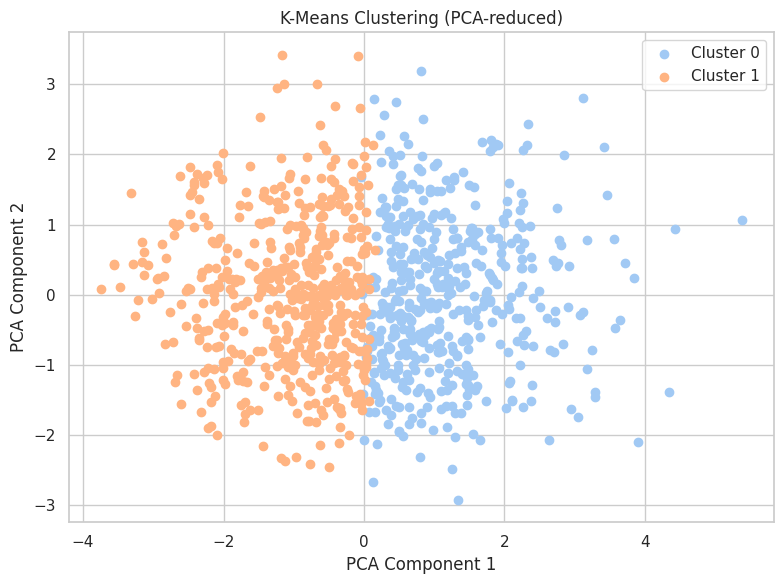

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply final KMeans with chosen K
kmeans_final = KMeans(n_clusters=final_k, random_state=42)
df['cluster'] = kmeans_final.fit_predict(features_for_clustering)

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
components = pca.fit_transform(features_for_clustering)

# Plot clusters
plt.figure(figsize=(8, 6))
for cluster_id in range(final_k):
    plt.scatter(
        components[df['cluster'] == cluster_id, 0],
        components[df['cluster'] == cluster_id, 1],
        label=f'Cluster {cluster_id}'
    )

plt.title('K-Means Clustering (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


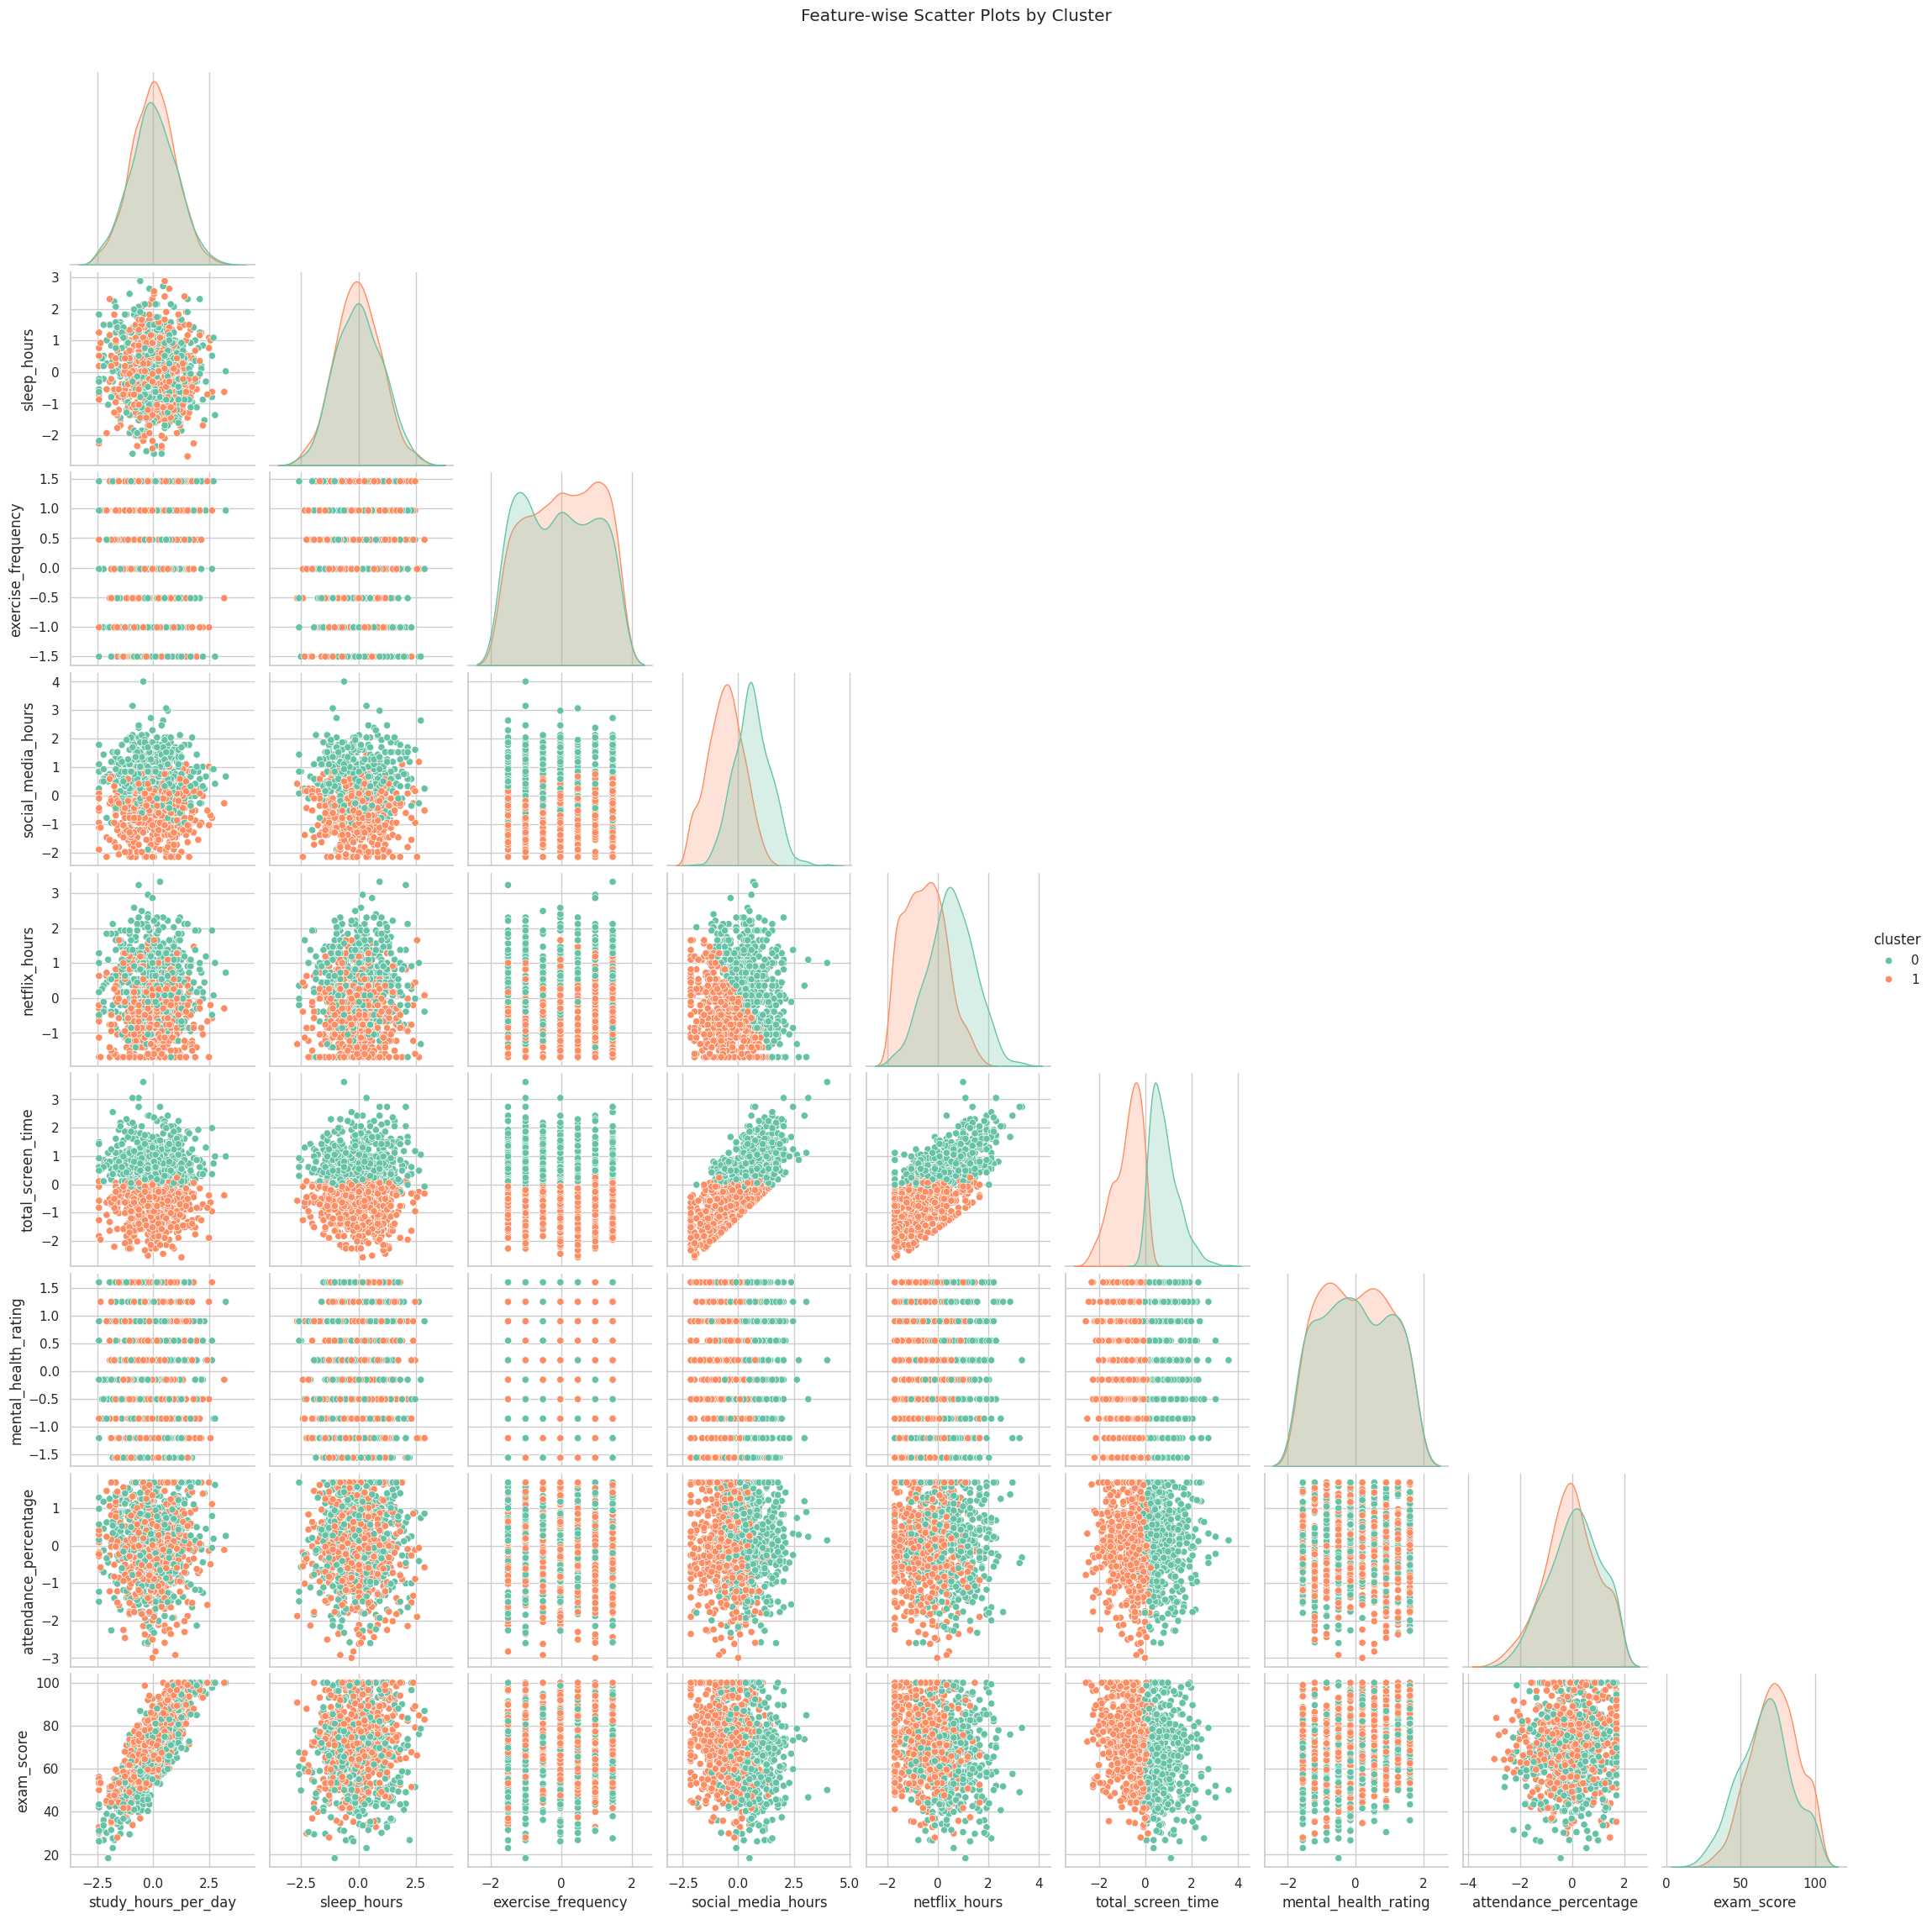

📊 Cluster Summary (Mean Values):


,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,total_screen_time
cluster,,,,,,,,,,,,,,,,
0,-0.024314,0.599585,0.000356,0.626830,0.540218,0.251037,0.078116,0.029301,1.190871,-0.076088,-0.195021,1.358921,0.000644,0.288382,66.324274,0.822416
1,0.022624,0.525097,-0.000331,-0.583266,-0.502674,0.181467,-0.072687,-0.027265,1.194981,0.070800,-0.235521,1.216216,-0.000600,0.345560,72.650965,-0.765259



🧮 Cluster Sizes:


,count
cluster,
0,482
1,518


In [ ]:
# Refit KMeans with final_k (ensure it's defined)
kmeans_final = KMeans(n_clusters=final_k, random_state=42)
df['cluster'] = kmeans_final.fit_predict(features_for_clustering)

# Now compute cluster summary
cluster_summary = df.groupby('cluster').mean(numeric_only=True)
cluster_sizes = df['cluster'].value_counts().sort_index()

# Create feature-wise scatter plots by cluster
features_to_plot = [
    'study_hours_per_day', 'sleep_hours', 'exercise_frequency',
    'social_media_hours', 'netflix_hours', 'total_screen_time',
    'mental_health_rating', 'attendance_percentage', 'exam_score', 'cluster'
]

# Generate pairplot
import seaborn as sns
import matplotlib.pyplot as plt

pairplot_fig = sns.pairplot(df[features_to_plot], hue='cluster', palette='Set2', diag_kind='kde', corner=True)
plt.suptitle('Feature-wise Scatter Plots by Cluster', y=1.02)
plt.show()

# Print cluster summary and sizes
print("📊 Cluster Summary (Mean Values):")
display(cluster_summary)

print("\n Cluster Sizes:")
display(cluster_sizes)

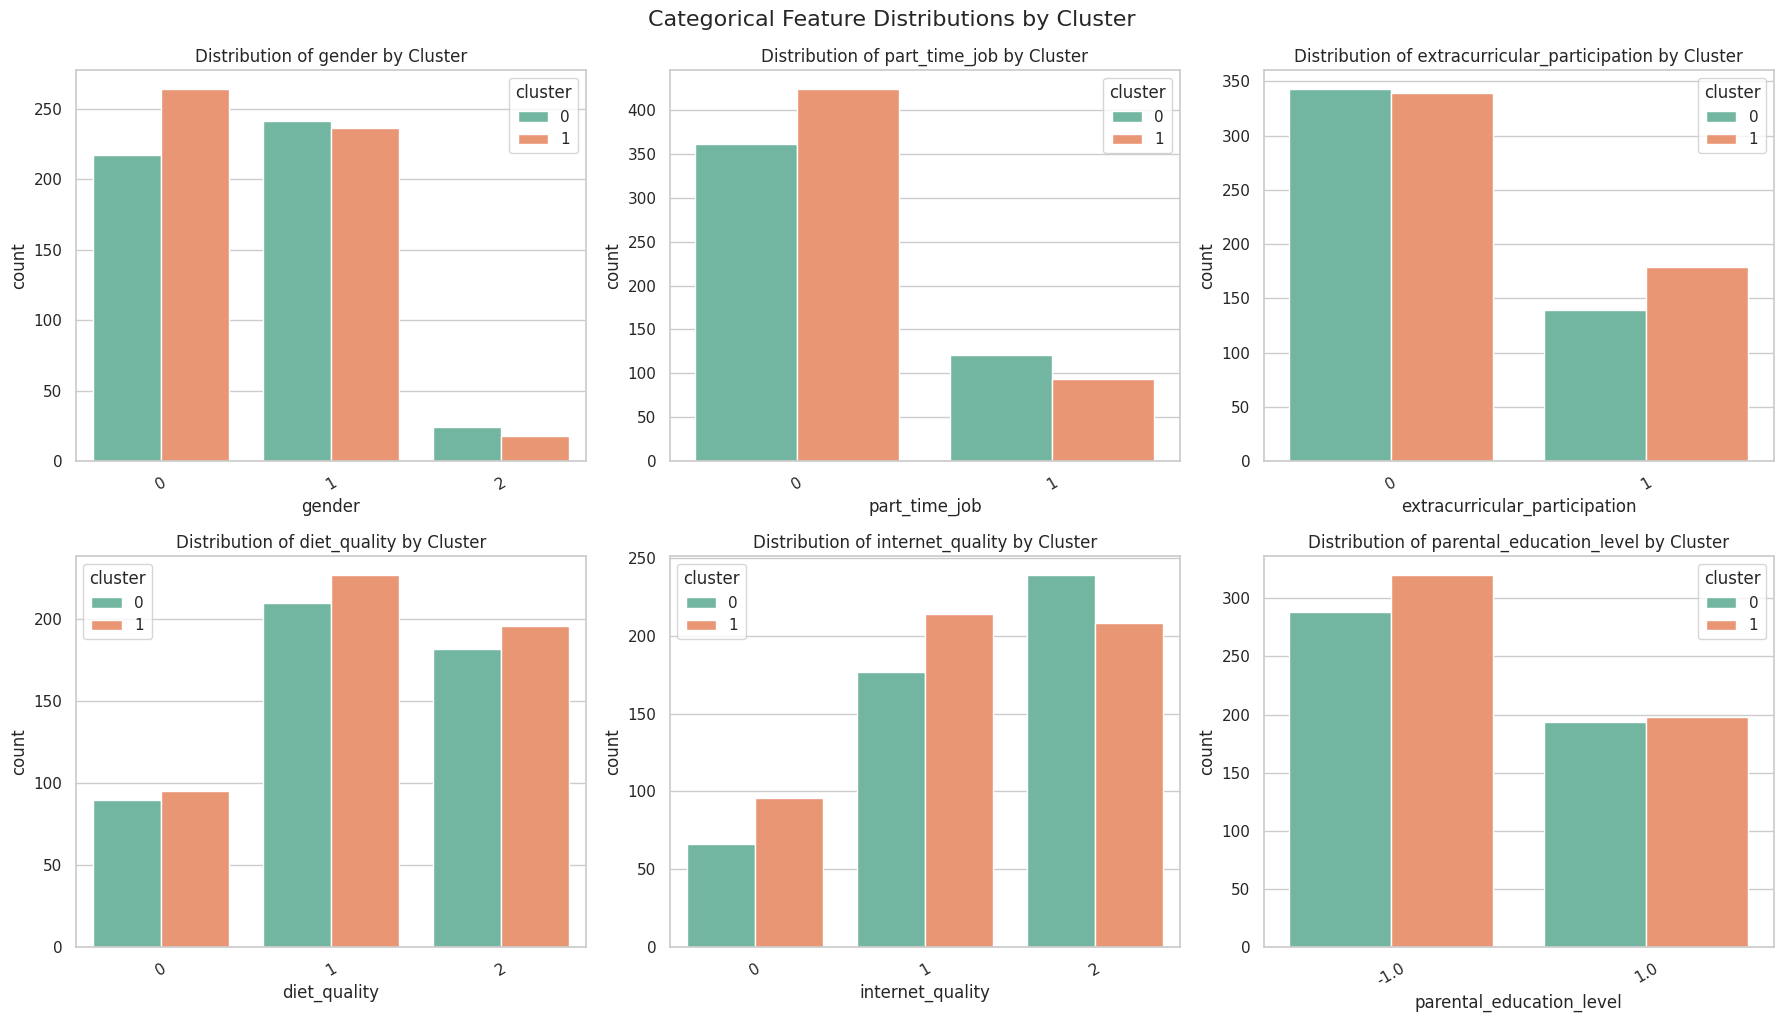

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = [
    'gender', 'part_time_job', 'extracurricular_participation',
    'diet_quality', 'internet_quality', 'parental_education_level'
]

# Set up the grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten to make it easy to index

# Plot each categorical feature
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, hue='cluster', palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Cluster')
    axes[i].tick_params(axis='x', rotation=30)

# Adjust layout
plt.tight_layout()
plt.suptitle('Categorical Feature Distributions by Cluster', fontsize=16, y=1.02)
plt.show()


## 5. Regression Analysis (Supervised Learning)
• Use the following models to predict Final Exam Score:
* Linear Regression
* Decision Tree Regressor
* Random Forest Regressor

• Evaluate models using:
* MAE, RMSE, and R² score
* Train/test split and cross-validatio


In [ ]:
from sklearn.model_selection import train_test_split

# Split df once and reuse across models
X = df.drop(columns=['exam_score', 'cluster'] if 'cluster' in df.columns else ['exam_score'])
y = df['exam_score']

# Use fixed random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-28-bb1eab724cff>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs.values, y=coefs.index, ax=axes[i, 3], palette='coolwarm')
<ipython-input-28-bb1eab724cff>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs.values, y=coefs.index, ax=axes[i, 3], palette='coolwarm')
<ipython-input-28-bb1eab724cff>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs.values, y=coefs.index, ax=axes[i, 3], palette='coolwarm')


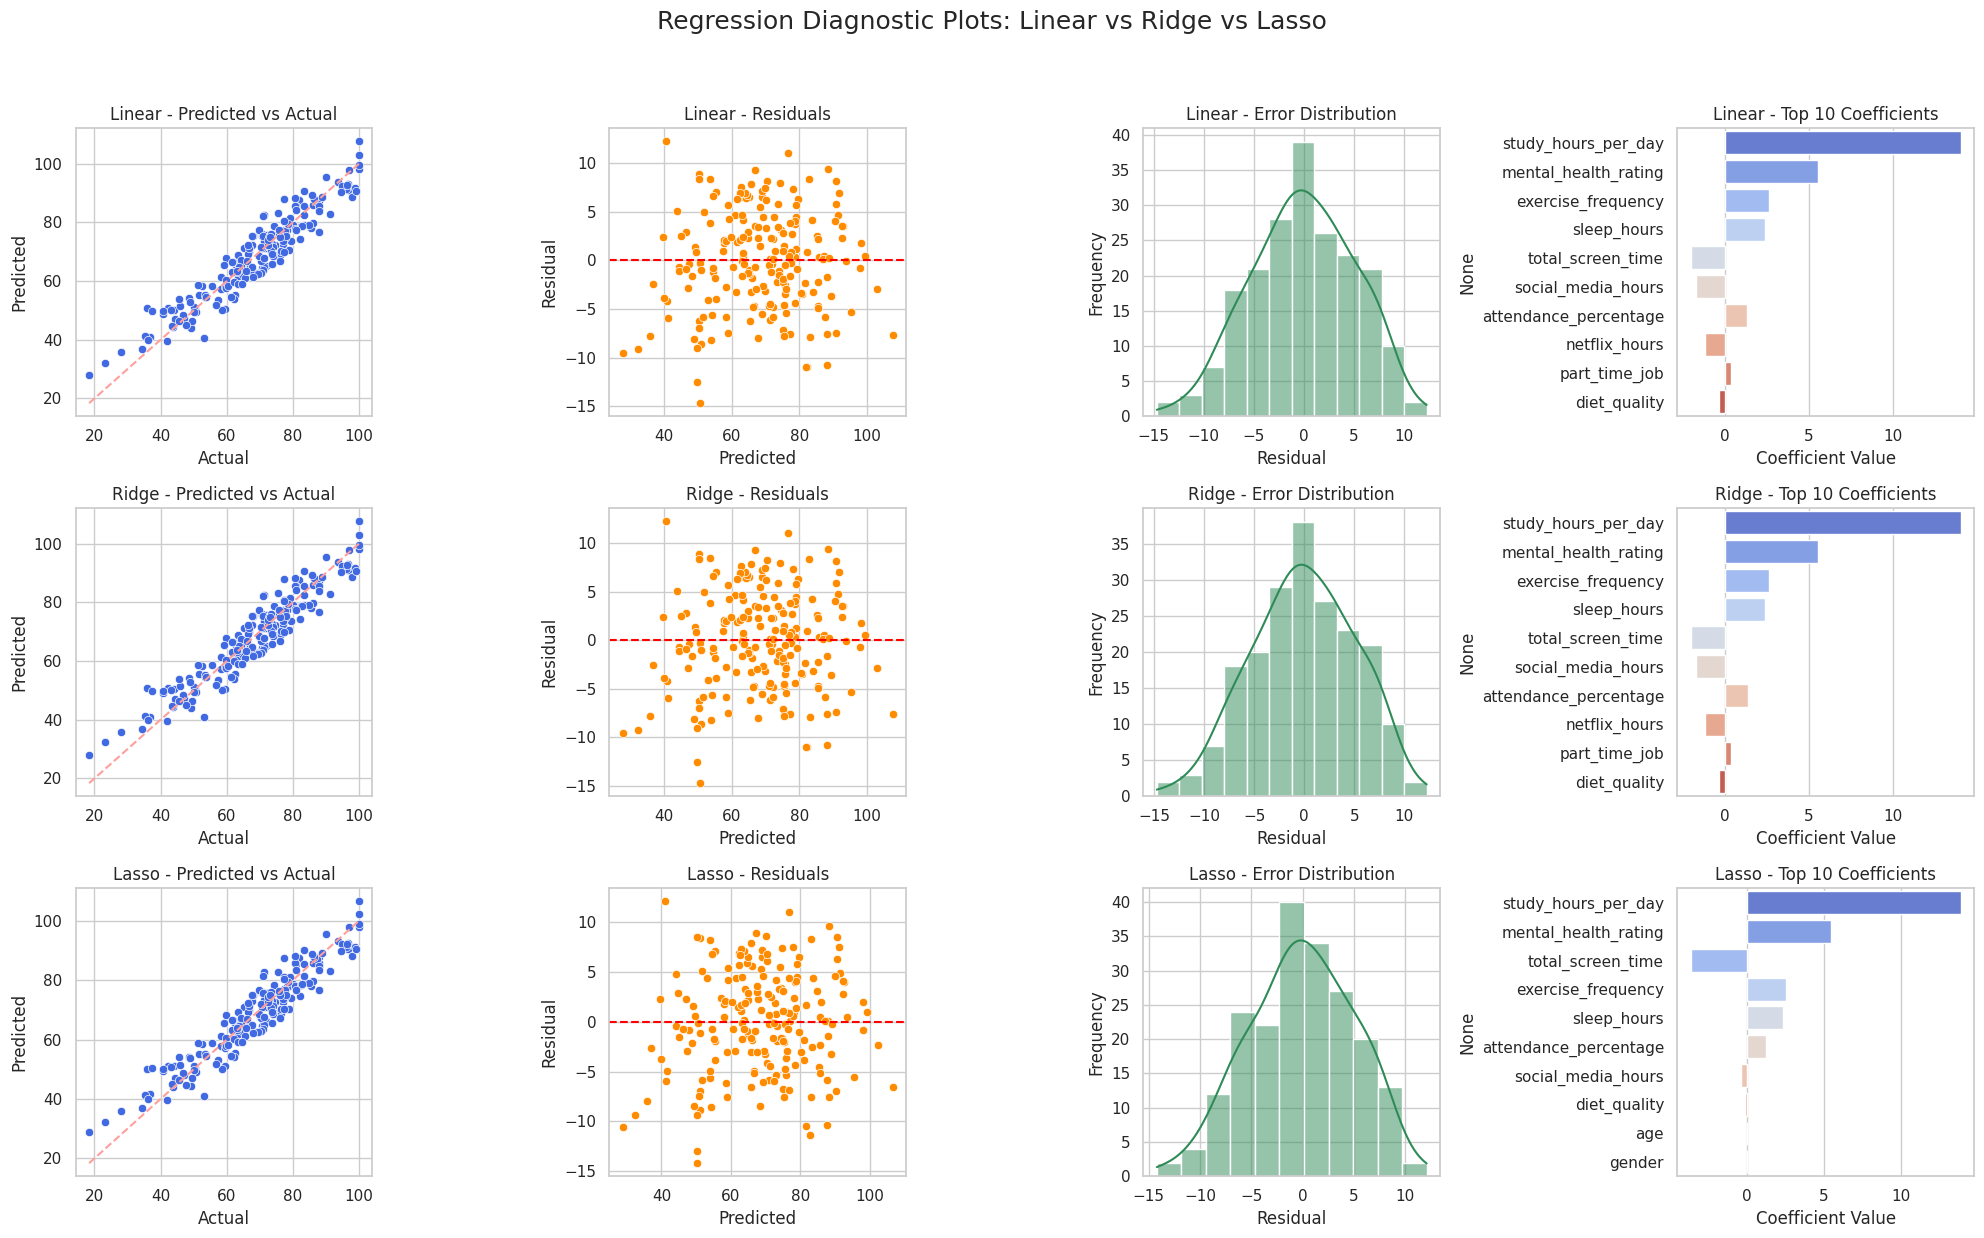

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import joblib



# Define models
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1)
}

# Prepare plot
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
fig.suptitle("Regression Diagnostic Plots: Linear vs Ridge vs Lasso", fontsize=18, y=1.03)

# Loop through models
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    # 1. Predicted vs Actual
    sns.scatterplot(x=y_test, y=y_pred, ax=axes[i, 0], color='royalblue')
    axes[i, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    axes[i, 0].set_title(f"{name} - Predicted vs Actual")
    axes[i, 0].set_xlabel("Actual")
    axes[i, 0].set_ylabel("Predicted")

    # 2. Residual Plot
    sns.scatterplot(x=y_pred, y=residuals, ax=axes[i, 1], color='darkorange')
    axes[i, 1].axhline(0, linestyle='--', color='red')
    axes[i, 1].set_title(f"{name} - Residuals")
    axes[i, 1].set_xlabel("Predicted")
    axes[i, 1].set_ylabel("Residual")

    # 3. Error Distribution
    sns.histplot(residuals, kde=True, ax=axes[i, 2], color='seagreen')
    axes[i, 2].set_title(f"{name} - Error Distribution")
    axes[i, 2].set_xlabel("Residual")
    axes[i, 2].set_ylabel("Frequency")

    # 4. Coefficients
    coefs = pd.Series(model.coef_, index=X.columns)
    coefs = coefs.sort_values(key=abs, ascending=False)[:10]  # Top 10 by abs value
    sns.barplot(x=coefs.values, y=coefs.index, ax=axes[i, 3], palette='coolwarm')
    axes[i, 3].set_title(f"{name} - Top 10 Coefficients")
    axes[i, 3].set_xlabel("Coefficient Value")

plt.tight_layout()
plt.show()


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
MAE: 6.82 | RMSE: 9.08 | R²: 0.678
Cross-Validated R²: 0.734 ± 0.044


<ipython-input-29-1ad98903d309>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, ax=axes[3], palette='coolwarm')


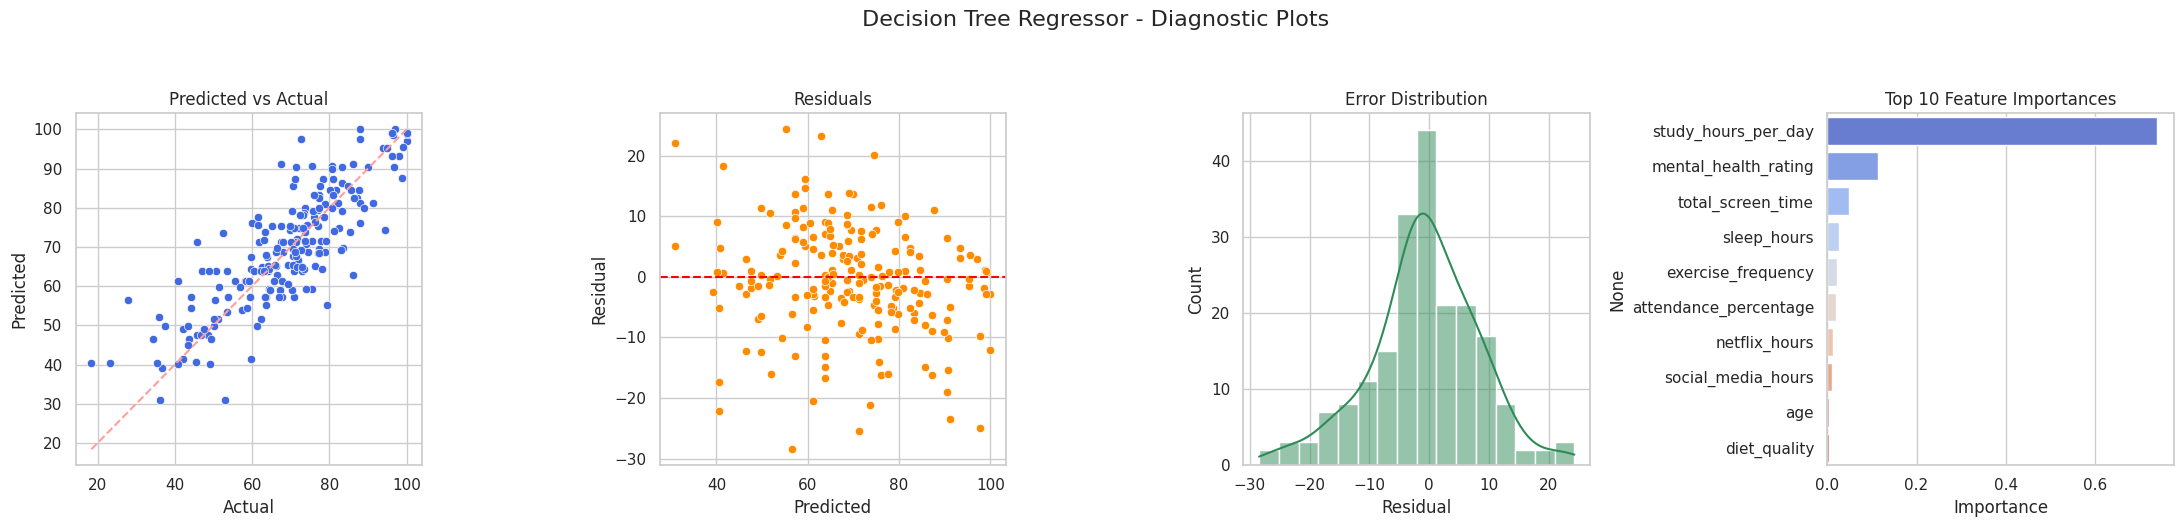

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import joblib

# Data split
X = df.drop(columns=['exam_score', 'cluster'] if 'cluster' in df.columns else ['exam_score'])
y = df['exam_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#1. Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtree = DecisionTreeRegressor(random_state=42)
grid = GridSearchCV(dtree, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

# Best model
best_tree = grid.best_estimator_
y_pred = best_tree.predict(X_test)
residuals = y_test - y_pred

# 2. Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(best_tree, X, y, cv=5, scoring='r2')

print("Best Hyperparameters:", grid.best_params_)
print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.3f}")
print(f"Cross-Validated R²: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

#  3. Diagnostic Plots
fig, axes = plt.subplots(1, 4, figsize=(22, 5))
fig.suptitle(" Decision Tree Regressor - Diagnostic Plots", fontsize=16, y=1.05)

# 1. Predicted vs Actual
sns.scatterplot(x=y_test, y=y_pred, ax=axes[0], color='royalblue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_title("Predicted vs Actual")
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")

# 2. Residual Plot
sns.scatterplot(x=y_pred, y=residuals, ax=axes[1], color='darkorange')
axes[1].axhline(0, linestyle='--', color='red')
axes[1].set_title("Residuals")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Residual")

# 3. Error Distribution
sns.histplot(residuals, kde=True, ax=axes[2], color='seagreen')
axes[2].set_title("Error Distribution")
axes[2].set_xlabel("Residual")

# 4. Feature Importances
importances = pd.Series(best_tree.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False)[:10]
sns.barplot(x=top_features.values, y=top_features.index, ax=axes[3], palette='coolwarm')
axes[3].set_title("Top 10 Feature Importances")
axes[3].set_xlabel("Importance")

plt.tight_layout()
plt.show()


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
MAE: 4.94 | RMSE: 6.09 | R²: 0.856
Cross-Validated R²: 0.861 ± 0.023


<ipython-input-30-a813b20c52a8>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, ax=axes[3], palette='coolwarm')


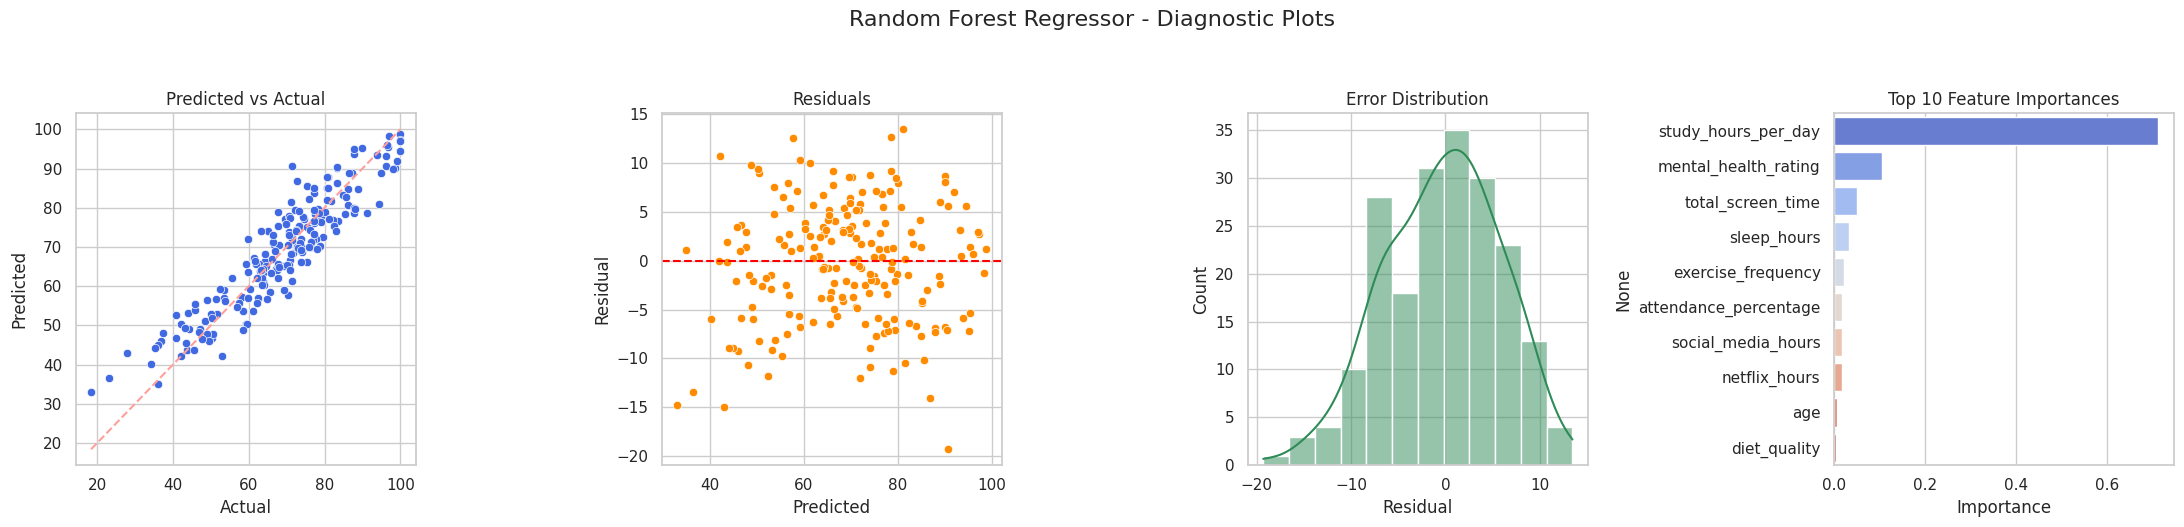

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

# Best Model
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)
residuals = y_test - y_pred

# 2. Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2')

print("Best Hyperparameters:", grid.best_params_)
print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.3f}")
print(f"Cross-Validated R²: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# 3. Diagnostic Plots
fig, axes = plt.subplots(1, 4, figsize=(22, 5))
fig.suptitle("Random Forest Regressor - Diagnostic Plots", fontsize=16, y=1.05)

# 1. Predicted vs Actual
sns.scatterplot(x=y_test, y=y_pred, ax=axes[0], color='royalblue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_title("Predicted vs Actual")
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")

# 2. Residual Plot
sns.scatterplot(x=y_pred, y=residuals, ax=axes[1], color='darkorange')
axes[1].axhline(0, linestyle='--', color='red')
axes[1].set_title("Residuals")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Residual")

# 3. Error Distribution
sns.histplot(residuals, kde=True, ax=axes[2], color='seagreen')
axes[2].set_title("Error Distribution")
axes[2].set_xlabel("Residual")

# 4. Feature Importances
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False)[:10]
sns.barplot(x=top_features.values, y=top_features.index, ax=axes[3], palette='coolwarm')
axes[3].set_title("Top 10 Feature Importances")
axes[3].set_xlabel("Importance")

plt.tight_layout()
plt.show()


In [ ]:
# Ensure df_original exists and df has a 'cluster' column
df_original = df_original.copy()  # in case it wasn't created yet
df_original['cluster'] = df['cluster'].values  # copy the cluster assignments























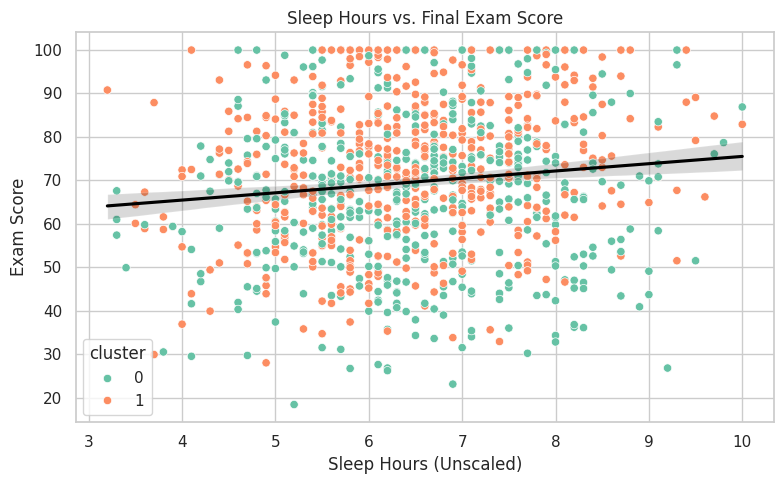

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_original, x='sleep_hours', y='exam_score', hue='cluster', palette='Set2')
sns.regplot(data=df_original, x='sleep_hours', y='exam_score', scatter=False, color='black')
plt.title('Sleep Hours vs. Final Exam Score')
plt.xlabel('Sleep Hours (Unscaled)')
plt.ylabel('Exam Score')
plt.tight_layout()
plt.show()


<ipython-input-33-fde57126bc70>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleep_group = df_original.groupby('sleep_range')['exam_score'].agg(['mean', 'count']).reset_index()
<ipython-input-33-fde57126bc70>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sleep_group, x='sleep_range', y='mean', palette='viridis')


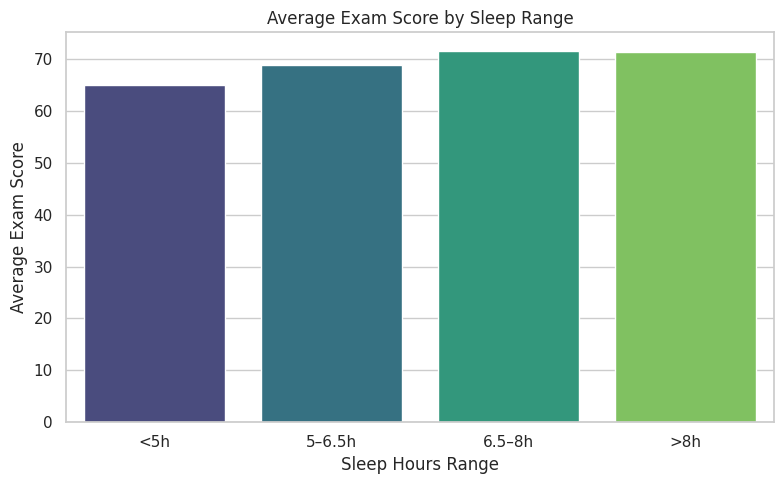

  sleep_range       mean  count
0         <5h  65.008661    127
1      5–6.5h  68.826585    410
2      6.5–8h  71.581667    360
3         >8h  71.428155    103


In [ ]:
# Bin sleep hours into meaningful ranges
df_original['sleep_range'] = pd.cut(
    df_original['sleep_hours'],
    bins=[0, 5, 6.5, 8, 10],
    labels=['<5h', '5–6.5h', '6.5–8h', '>8h']
)

# Group and aggregate exam scores by sleep range
sleep_group = df_original.groupby('sleep_range')['exam_score'].agg(['mean', 'count']).reset_index()

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=sleep_group, x='sleep_range', y='mean', palette='viridis')
plt.title('Average Exam Score by Sleep Range')
plt.xlabel('Sleep Hours Range')
plt.ylabel('Average Exam Score')
plt.tight_layout()
plt.show()

# Optional: Display the table
print(sleep_group)


In [ ]:
# Pearson correlation between sleep hours and exam score
correlation = df_original[['sleep_hours', 'exam_score']].corr().iloc[0, 1]
print(f"🔗 Pearson Correlation between sleep hours and exam score: {correlation:.3f}")


🔗 Pearson Correlation between sleep hours and exam score: 0.122


## 6. Optional Classification Task
- Convert scores into performance levels:
  - Low (bottom 33%)
  - Average (middle 34%)
  - High (top 33%)
- Train classification models (e.g., Logistic Regression, Decision Tree)
- Evaluate with confusion matrix, accuracy, and F1-score


In [ ]:

# 2. Backup full dataset
df_original = df.copy()

# 3. Create performance level labels based on exam_score
df_original['performance_level'] = pd.qcut(
    df_original['exam_score'],
    q=[0, 1/3, 2/3, 1],
    labels=['Low', 'Average', 'High']
)

# 4. Encode performance levels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_class = le.fit_transform(df_original['performance_level'])

# 5. Prepare features
X_class = df_original.drop(columns=['exam_score', 'performance_level', 'student_id'], errors='ignore')
X_class = pd.get_dummies(X_class, drop_first=True)

# 6. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# 7. Train models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC()
}

# 8. Evaluate models
metrics_data = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics_data.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (macro)": precision_score(y_test, y_pred, average='macro'),
        "Recall (macro)": recall_score(y_test, y_pred, average='macro'),
        "F1 Score (macro)": f1_score(y_test, y_pred, average='macro')
    })

# 9. Display evaluation results
metrics_df = pd.DataFrame(metrics_data).sort_values(by="Accuracy", ascending=False)
metrics_df


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision (macro),Recall (macro),F1 Score (macro)
0,Logistic Regression,0.815,0.819739,0.821133,0.819279
2,Random Forest,0.775,0.774725,0.789151,0.778206
1,Decision Tree,0.630,0.624342,0.652730,0.629467
3,Support Vector Machine,0.525,0.356944,0.574910,0.435472


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 600x500 with 0 Axes>

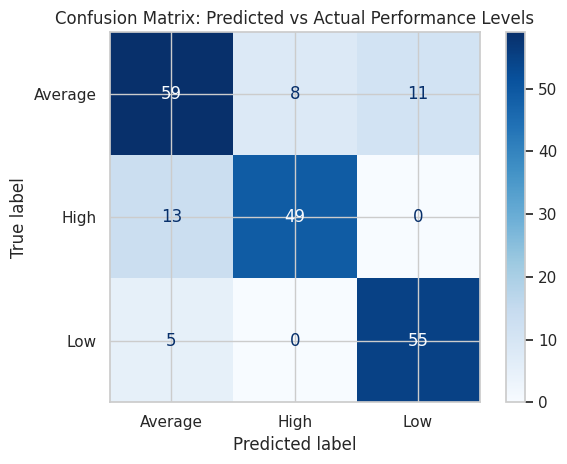

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#  Logistic Regression
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Plot
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: Predicted vs Actual Performance Levels")
plt.tight_layout()
plt.show()


## IV. Interpretation and Insights
A. Feature Importance
- For tree-based models, plot and analyze feature importance
- For linear models, interpret coefficients
- Identify the top 3–5 features that most affect performance

B. Cluster Profiling
- For each cluster:
- Describe common behaviors (e.g., “Cluster 1 sleeps less, studies more”)
- Associate average exam scores with each group
- Comment on trends you observe (e.g., does screen time correlate with lower scores?)

C. Model Performance
- Which model performed best? Why?
- Are there trade-offs between interpretability and accuracy?

D. Real-World Implications
- What advice could you give students based on your findings?
- Are there surprising or counterintuitive results?


### A. Feature Importance

**Tree-Based Models (Random Forest)**

Feature importance analysis shows that the top predictors of exam score are:

* Study Hours per Day

* Attendance Percentage

* Sleep Hours

* Mental Health Rating

* Screen Time (Social + Netflix)

These features had the highest influence on decision splits in the Random Forest model.

**Linear Models (Linear Regression)**

Coefficients from the linear regression model echoed similar insights. Positive coefficients were highest for:

* Study hours

* Attendance

* Sleep hours

Negative coefficients were observed for:

* Screen time

* Poor diet quality



### B. Cluster Profiling


Using **K-Means** clustering (k=2), we observed the following:

Cluster 0 (High Performers):

* Higher average exam scores

* More study hours per day

* More consistent sleep patterns

* Lower screen time

* Higher attendance

* More frequent exercise

* Slightly better mental health ratings

Cluster 1 (Struggling Students):

* Lower exam scores

* More screen time (especially Netflix and social media)

* Fewer study hours and inconsistent routines

* Lower attendance and physical activity

Key Trend: Higher screen time tends to correlate with lower exam performance, while healthy routines (study, sleep, exercise) appear in the high-performing group

### C. Model Performance

|index|Model|Accuracy|Precision \(macro\)|Recall \(macro\)|F1 Score \(macro\)|
|---|---|---|---|---|---|
|0|Logistic Regression|0\.815|0\.8197387407913724|0\.8211331679073615|0\.8192785357870745|
|2|Random Forest|0\.775|0\.7747252747252746|0\.7891508133443618|0\.7782060459225814|
|1|Decision Tree|0\.63|0\.6243421052631578|0\.6527295285359801|0\.6294673721340388|
|3|Support Vector Machine|0\.525|0\.35694444444444445|0\.5749103942652329|0\.43547209181012|

Best Model:

**Logistic Regression** outperformed all others with an accuracy of 81.5%, as well as the highest precision (81.97%) and F1 score (81.93%). It was the most balanced model in terms of predictive quality and reliability.

Trade-offs:

**Logistic Regression** is both accurate and interpretable, making it ideal for educational applications where understanding decision logic is important.

**Random Forest** offers slightly lower accuracy (77.5%) but better recall than most models, which helps reduce false negatives. However, it’s more complex and less transparent.

**Decision Tree** is easy to interpret but prone to overfitting and less accurate (63%).

**Support Vector Machine (SVM)** had the lowest performance (52.5% accuracy), showing that it may not be well-suited to this dataset without additional tuning.

### D.  Real-World Implications

Advice for Students:

Study habits, sleep, and attendance have a direct impact on performance. Prioritizing consistency in these areas is key.

Limiting screen time—especially on platforms like Netflix and social media—is strongly associated with higher academic performance.

Mental health plays a meaningful role; students reporting higher well-being also tend to perform better.

Surprising Findings:

Some students with moderate study hours still achieved high scores when balanced with good sleep and lower screen time—suggesting quality of habits may be more important than quantity alone.

Parental education level had a weaker influence compared to students' own routines and wellness indicators, highlighting the importance of self-driven habits over background factors.

